# predicting heart disease using machine learning
Himanshu

This notebook looks into various python based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes

we're going to take the following approach: 
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

In a statement,
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the cleveland data from the UCI machine learning repo

## 3. Evaluation

> If we can reach 90% at predicting whether or not a pateint has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

* ageage in years
* sex(1 = male; 0 = female)
* cp chest pain type, 0,1,2,3
* trestbpsresting blood pressure (in mm Hg on admission to the hospital) 
* cholserum cholestoral in mg/dl
* fbs (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecgresting electrocardiographic results 
* thalachmaximum heart rate achieved
* exangexercise induced angina (1 = yes; 0 = no)
* oldpeakST depression induced by exercise relative to rest
* slopethe slope of the peak exercise ST segment
* canumber of major vessels (0-3) colored by flourosopy
* tha13 = normal; 6 = fixed defect; 7 = reversable defect
* target1 or 0


## Preparing the tools

we're going to use pandas, matplotlib and numpy for data analysis and manipulation

In [1]:
#import all tools we need

#regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #plotting library built on matplotlib

%matplotlib inline  
#we want our plots to appear inside the notebook

#models from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay


## Load data

In [4]:
df = pd.read_csv("heart-disease.csv")
df.shape #("rows, columns")

(303, 14)

## Data exploration (EDA)

The goal here is to find out more about the data and become subject matter expert on the data set you're working with

1. What question(s) are you trying to solve?
2. What kind of data do we have and how to we trat different types?
3. What's missing from the data and how do you deal with it?
4. where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [14]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [15]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
#how many of each class there are
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

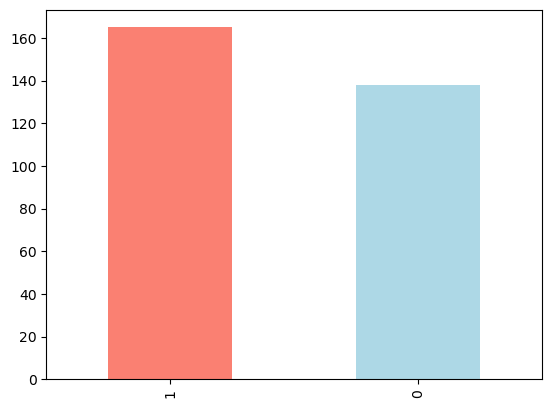

In [6]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [19]:
df.info() #no null 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [20]:
#are there any missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [21]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### heart disease frequency according to sex

In [23]:
df.sex.value_counts()#male = 1, female = 0

1    207
0     96
Name: sex, dtype: int64

In [24]:
#compare target column with sex column
pd.crosstab(df.target,df.sex)

sex,0,1
target,,
0,24,114
1,72,93


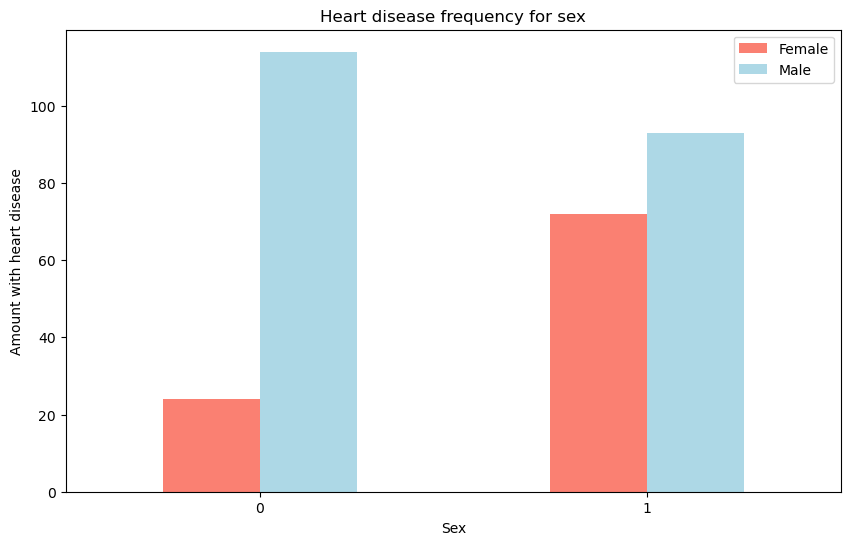

In [44]:
# Create a plot of crosstab
pd.crosstab(df.target,df.sex).plot(kind="bar",
                                   figsize=(10,6),
                                   color=["salmon", "lightblue"],
                                   xlabel="Sex",
                                   ylabel="Amount with heart disease",
                                   );

plt.title("Heart disease frequency for sex");
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

In [90]:
df["thalach"].value_counts() #because theres so many different values, you can't really use a bargraph

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

### Age vs max heart rate for heartdisease

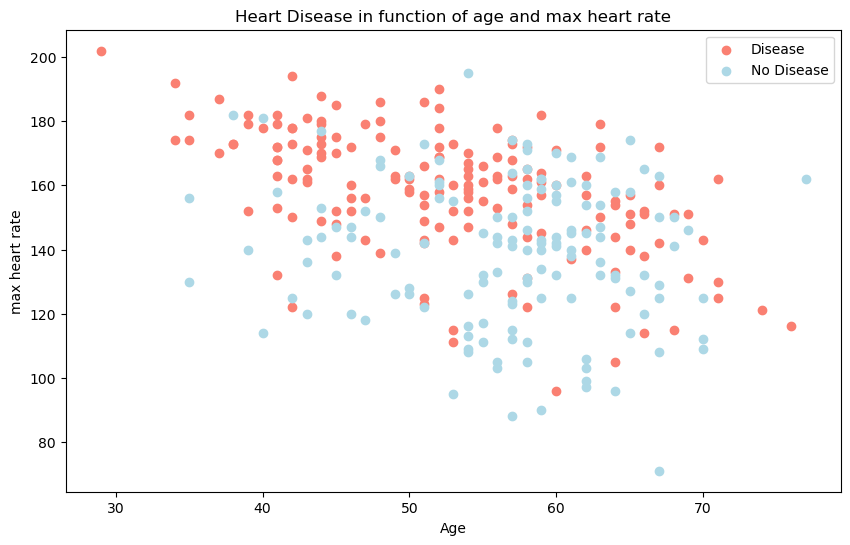

In [7]:
# Creat another figure
plt.figure(figsize=(10,6))

#scatter with positive example
plt.scatter(df.age[df.target==1], #this is doing subset of dataset age where target = 1
            df.thalach[df.target==1],
            c="salmon");
#the younger someone is the higher their heartrate. patients with heart disease

#scatter with negative examples

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c="lightblue");
#line kinda goes down for both

#Add some helpful info
plt.title("Heart Disease in function of age and max heart rate")
plt.xlabel("Age")
plt.ylabel("max heart rate")
plt.legend(["Disease", "No Disease"]);

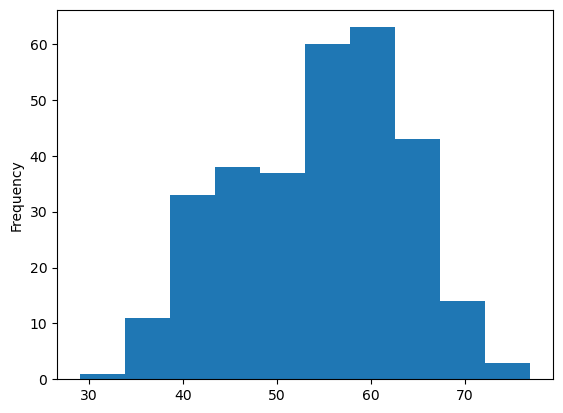

In [101]:
# Check distribtion (spread of data) of the age column with a histrogram
df.age.plot.hist();

### heart disease frequency per chestpain type

* cp chest pain type, 0,1,2,3
> * 0 - Typical angina: chest pain related decrease bood supply to heart
> * 1 - Atypical angina: chest pan not related to heart
> * 2 - Non-anginal pain: typically esophageal spasms (non heart related)
> * 3 - Asymptomatic: Chest pain not showing signs of disease


In [103]:
pd.crosstab(df.cp,df.target)
#eg two does not make sense, you might need to work with a professional in the field (e.g doctor/cardiologist)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


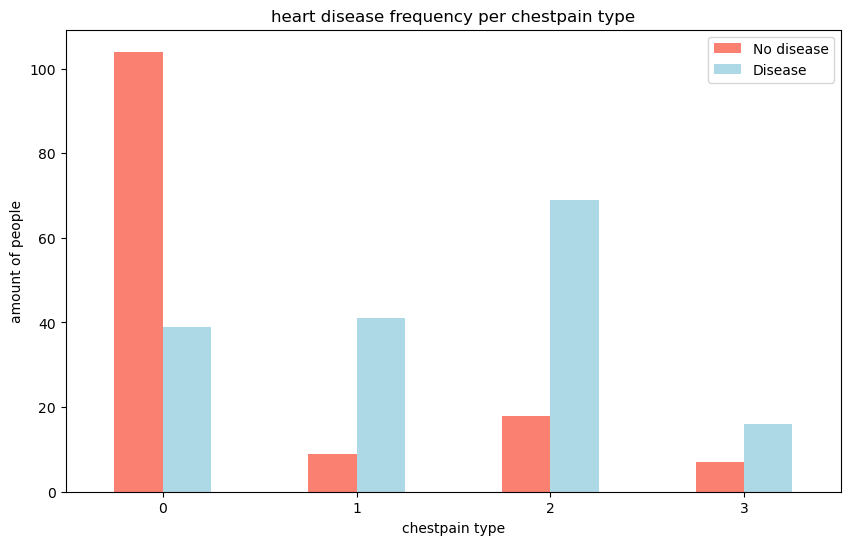

In [105]:
# visual
pd.crosstab(df.cp,df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color = ["salmon","lightblue"])

plt.title("heart disease frequency per chestpain type")
plt.xlabel("chestpain type")
plt.ylabel("amount of people")
plt.legend(["No disease", "Disease"])
plt.xticks(rotation=0);

In [106]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [107]:
# Make a correlation matrix - see how the multiple variables are interacting with each other
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


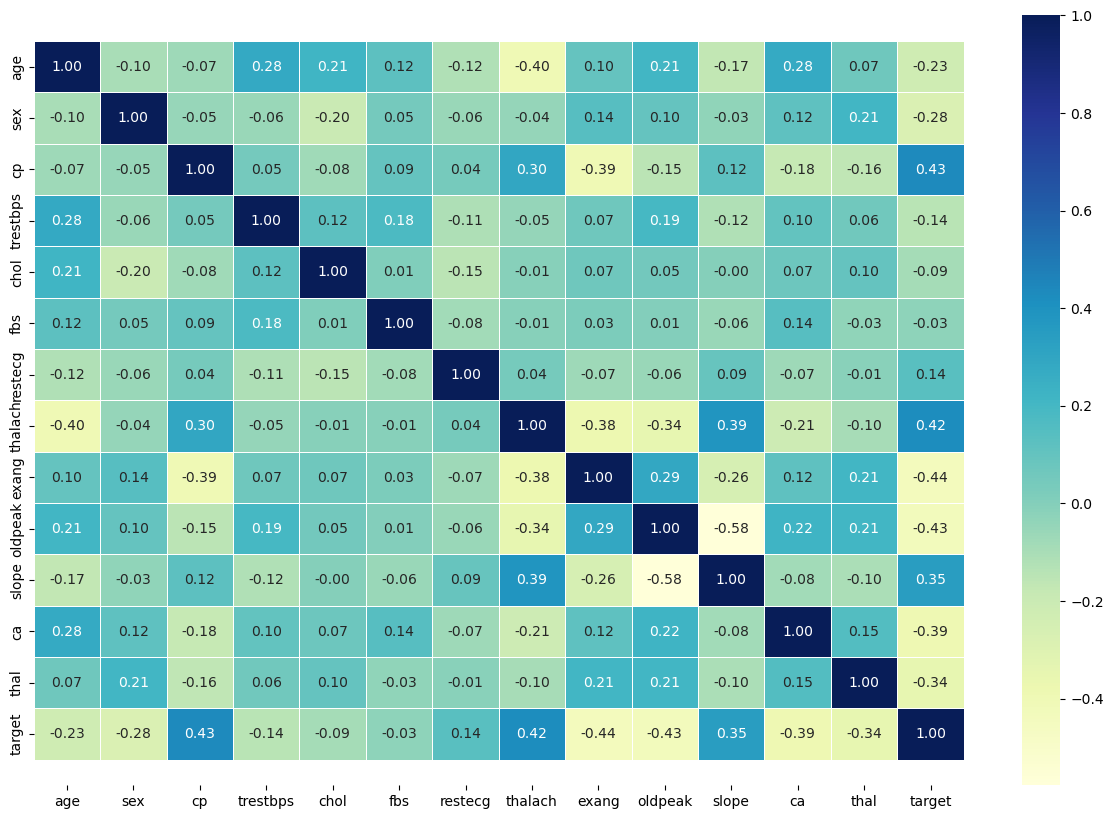

In [8]:
#correlation matrix 
corr_matrix = df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5);

## 5. Modelling

In [114]:

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
x = df.drop("target", axis=1)
y = df["target"]

#split into test and train sets
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

#build ml model
clf = RandomForestClassifier(n_estimators=100)

clf.fit(xtrain,ytrain)

clf.score(xtest,ytest)

0.9016393442622951

We're going to try 3 different ML models

1. logistic regression
2. knearest neighbors classifier
3. random forest classifier

In [11]:
#put models in dict

models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

#Create a function to fit and score models
def fitandscore(models,xtrain,xtest,ytrain,ytest):
    """Fits and evals given machine learning models
       Models: a dict of different sklearn ml models
       xtrain: training data (no labels)
       xtest: testing data (no labels)
       ytrain: train labels
       ytest: test labels
     """
    np.random.seed(42)
    #make a dict to keep models scores
    modelscores = {}
    #loop thru models
    for name, model in models.items():
        #fit the model to the data
        model.fit(xtrain,ytrain)
        #eval model and append score to model score
        modelscores[name] = model.score(xtest,ytest)
        
    return modelscores


In [12]:
modelscores = fitandscore(models,
                          xtrain,
                          xtest,
                          ytrain,
                          ytest)

modelscores

C:\Users\Himanshu\Desktop\projectheartdisease\env\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8852459016393442}

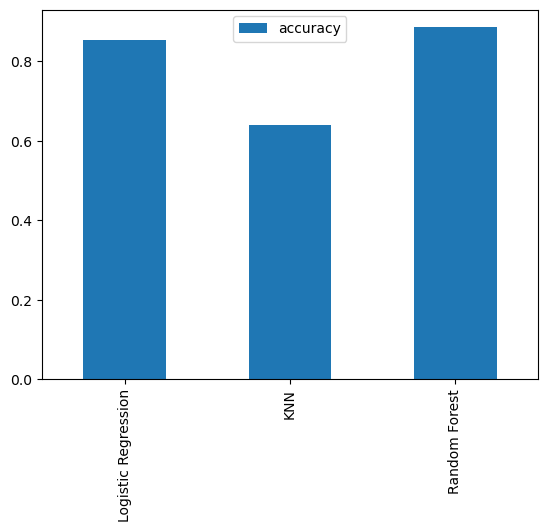

In [13]:
modelcompare = pd.DataFrame(modelscores, index=["accuracy"]) #accuracy because thats what it classifiers return by default
modelcompare.T.plot.bar();

Now we've got a baseline model... and we know a model's first predictions arent always what we should based off our next steps off of

let's look at the following:

* Hyperparameter tuing 
* feature importance
* confusion matrix
* Cross validation
* Presicion
* Recall
* F1 score
* Classifcation report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter tuning


In [14]:
# let's tune KNN
trainscores = []
testscores = []

# create a list of different values for n_neighbors
neighbours = range(1,21) #loop thru 1-20
np.random.seed(42)
#set up knn instance
knn = KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbours:
    knn.set_params(n_neighbors=i) # one of the hypertuning parameters in KNN is n_neighbors
    
    #fir the algo
    knn.fit(xtrain,ytrain)
    
    #update the training scores list
    trainscores.append(knn.score(xtrain,ytrain))
    
    #update the test xscores list
    testscores.append(knn.score(xtest,ytest))
    
    



In [131]:
trainscores

[1.0,
 0.8223140495867769,
 0.7768595041322314,
 0.78099173553719,
 0.7892561983471075,
 0.78099173553719,
 0.7727272727272727,
 0.768595041322314,
 0.7644628099173554,
 0.743801652892562,
 0.743801652892562,
 0.7396694214876033,
 0.7272727272727273,
 0.7355371900826446,
 0.7231404958677686,
 0.731404958677686,
 0.7355371900826446,
 0.7355371900826446,
 0.7107438016528925,
 0.731404958677686]

In [15]:
testscores

[0.6885245901639344,
 0.7540983606557377,
 0.6721311475409836,
 0.7049180327868853,
 0.639344262295082,
 0.6721311475409836,
 0.6229508196721312,
 0.6557377049180327,
 0.639344262295082,
 0.6885245901639344,
 0.5737704918032787,
 0.639344262295082,
 0.5901639344262295,
 0.639344262295082,
 0.6065573770491803,
 0.5901639344262295,
 0.5573770491803278,
 0.5737704918032787,
 0.5573770491803278,
 0.5737704918032787]

Maximum KNN score on the data: 75.41%


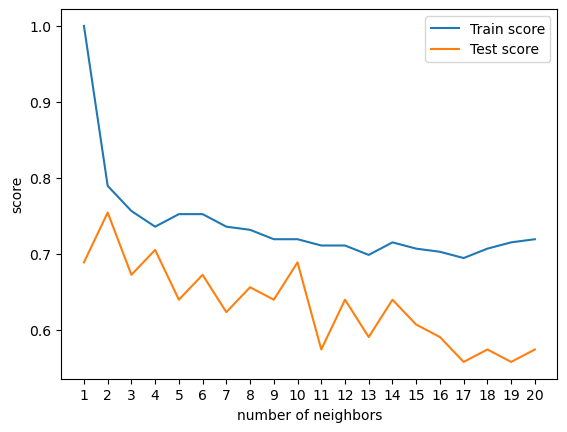

In [16]:
plt.plot(neighbours,trainscores,label="Train score")
plt.plot(neighbours, testscores,label="Test score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("number of neighbors")
plt.ylabel("score")
plt.legend()

print(f"Maximum KNN score on the data: {max(testscores)*100:.2f}%")

## Hyperparameter tuning with RandomizedSearchCV

we're going to tune:
* LogisticRegression()
* RandomForestClassifier()
> ... using RandomizedSearchCV

In [17]:
np.logspace(-4,4,20)

array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])

In [18]:
# create a hyperparameter grid of LogisticRegressioabs
logreggrid = {"C":np.logspace(-4,4,20),#returns numbers evenly on a log scale
              "solver": ["liblinear"]
              }

#Create a hyperparameter grid of randomforestclassifier
rfgrid={"n_estimators": np.arange(10,1000,50),
        "max_depth": [None,3,5,10],
        "min_samples_split": np.arange(2,20,2),
        "min_samples_leaf": np.arange(1,20,2)}

Now we've got hyperparameter grids setup for each of our models, let's tune them using RandomizedSearchCV

In [20]:
# tune logisticregression
np.random.seed(42)
#setup random hyperparameter search for logistricregression
rslogreg=RandomizedSearchCV(LogisticRegression(),
                            param_distributions=logreggrid,
                            cv=5,
                            n_iter=20, #going to go over all those parameters 20 times randomly
                            verbose=True) #basically output  = true

# Fit random hyperparameter search model for logisiticregression
rslogreg.fit(xtrain,ytrain);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [21]:
rslogreg.best_params_

{'solver': 'liblinear', 'C': 0.08858667904100823}

In [22]:
rslogreg.score(xtest,ytest)

0.8688524590163934

Now that we've tuned logisticregression() let's do the same for the randomforestclassifier()

In [23]:
#setup random seed
np.random.seed(42)

#setup random hyperparameter search for randomforstclassifier

rsrf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rfgrid,
                          cv=5,
                          n_iter=20,
                          verbose=True)

#fit random hyperparameter search model for randomforestclassifier()
rsrf.fit(xtrain,ytrain);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [24]:
#find best params
rsrf.best_params_

{'n_estimators': 460,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_depth': None}

In [159]:
# evaluate the randomized search randomforstclasifier model
rsrf.score(xtest,ytest)

0.8360655737704918

In [25]:
modelscores

{'Logistic Regression': 0.8524590163934426,
 'KNN': 0.639344262295082,
 'Random Forest': 0.8852459016393442}

1. by hand
2. randomizedsearchcv
3. gridsearchcv

## Hyperparameters tuning with gridsearchCV

use gridsearchcv to improve score of logisiticdregressionmodel

In [26]:
# Different hyperparameters for our logisitcregression model
logreggrid = {"C": np.logspace(-4,4,30),
              "solver": ["liblinear"]}

#setup grid hyperparameter search for logisiticregression
gslogreg = GridSearchCV(LogisticRegression(),
                        param_grid=logreggrid,
                        cv=5,
                        verbose=True)

#fit grid hyperparameter search model
gslogreg.fit(xtrain,ytrain);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [27]:
#check best hyperparameters
gslogreg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [28]:
gslogreg.score(xtest,ytest)

0.8688524590163934

## Evaluating our tuned machine learning classifier, beyond accuracy

* ROC Curve and AUC score
* Confusion Matrix
* Classification report
* Presicion
* Recall
* F1-score

... and it would be great if cv was used where possible

to make comparisions and evualate our trained model, first we need to make preds

In [32]:
#make preds with tuned model
ypreds = gslogreg.predict(xtest)
ypreds

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [33]:
# roc curve - plotting true positive rates agaisnt false positve rates
#plot roc curve and caluclate AUC metric
plot_roc_curve()

NameError: name 'plot_roc_curve' is not defined

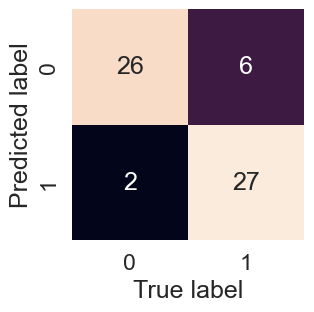

In [34]:
sns.set(font_scale=1.5)
def plot_conf_map(ytest, ypreds):
    """Plots a confusion matrix"""
    fix,ax=plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(ytest,ypreds),
                     annot = True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
plot_conf_map(ytest,ypreds)

In [35]:
##Now we've got a confusion matrix, lets get a classification report as well as crossvalidated prescion, recall and f1score.
print(classification_report(ytest, ypreds))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87        32
           1       0.82      0.93      0.87        29

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



### Calculate evaluation metrics using cross val.
We're going to calcualte precision, recall and f1-score of our model using cross-validation to do so we'll be using
`Cross_val_score()`

In [36]:
# Check best hyperparameters
gslogreg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [38]:
#create a new classifier with best parameters
clf = LogisticRegression(C=0.38566204211634725,
                         solver="liblinear")

In [40]:
# cross validated accuracy
cvacc = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="accuracy")
cvacc

array([0.81967213, 0.8852459 , 0.86885246, 0.86666667, 0.75      ])

In [42]:
cvacc = np.mean(cvacc)
cvacc

0.8380874316939891

In [43]:
# cross validated precision
# cross validated accuracy
cvprec = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="precision")
cvprec

array([0.775     , 0.88235294, 0.85714286, 0.83783784, 0.725     ])

In [45]:
cvprec = np.mean(cvprec)
cvprec

0.8154667272314331

In [46]:
# cross validated recall
cvrecall = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="recall")
cvrecall

array([0.93939394, 0.90909091, 0.90909091, 0.93939394, 0.87878788])

In [47]:
cvrecall = np.mean(cvrecall)

In [50]:
# cross validated f1score
cvf1 = cross_val_score(clf,
                        x,
                        y,
                        cv=5,
                        scoring="f1")
cvf1

array([0.84931507, 0.89552239, 0.88235294, 0.88571429, 0.79452055])

In [52]:
cvf1 = np.mean(cvf1)
cvf1

0.8614850462777628

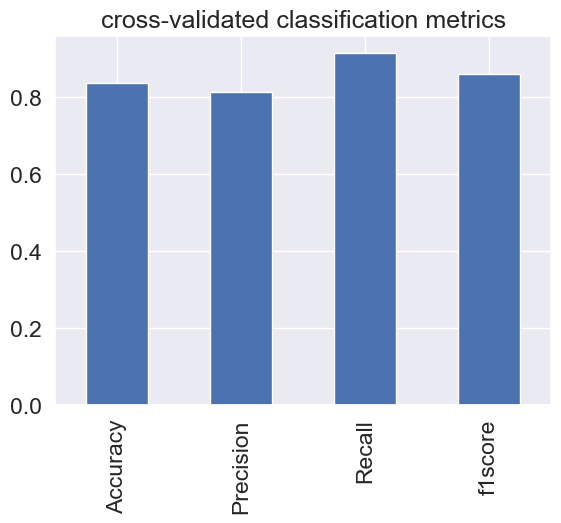

In [60]:
#visualize cross validated metrics
cvmetrics = pd.DataFrame({"Accuracy":cvacc, "Precision": cvprec, "Recall": cvrecall, "f1score":cvf1},
                         index=[0])
cvmetrics.T.plot.bar(title="cross-validated classification metrics",
                     legend=False);

### Feature Importance

Feature importance is another as asking, "which features contribued most to the outcomes of the model and how did they contribute?"

Finding feature importance is different for each ML model. One way to find feature importance is to search for "(Model name) feature importance"

lets find the feature importance for our logisitcregression model...

In [64]:
# Fit an instance of logisiticregression
gslogreg.best_params_

clf=LogisticRegression(C=0.38566204211634725,
                       solver="liblinear")

clf.fit(xtrain,ytrain);

In [66]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
#check coef_
clf.coef_ #how each attribute in xtrain contributes to your labels (ytarget)

array([[ 0.02049311, -1.03055329,  0.61681568, -0.01585449, -0.003959  ,
         0.12729742,  0.37866536,  0.02883059, -0.64988161, -0.5092714 ,
         0.40161858, -0.72881243, -0.78386215]])

In [72]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [71]:
# Match coef's of features to coluumns
featuredict = dict(zip(df.columns, list(clf.coef_[0])))
featuredict# how much each of thse contribute towards making a desicion for the target var.

{'age': 0.020493108558441085,
 'sex': -1.0305532886499345,
 'cp': 0.616815680433825,
 'trestbps': -0.015854493277931203,
 'chol': -0.003959000997939239,
 'fbs': 0.1272974170588578,
 'restecg': 0.37866535735653684,
 'thalach': 0.028830590149507937,
 'exang': -0.6498816095053482,
 'oldpeak': -0.509271403713171,
 'slope': 0.4016185818130396,
 'ca': -0.7288124348474452,
 'thal': -0.7838621512797743}

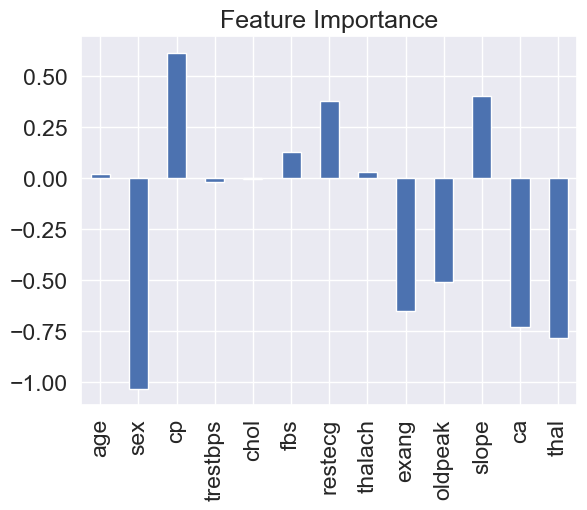

In [78]:
# Visualize feature importance
featuredf = pd.DataFrame(featuredict, index=[0])
featuredf.T.plot.bar(title="Feature Importance", legend=False);
# below you can remove data that isnt contributing much at all. less but better - you can reduce the 
#features that your model doesnt really need. this can save you on computation but you can focus on the features
# that provide more accuracy and less confusion for your ML model.

In [75]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


slope - the slope of the peak excercise ST segment
* 0: unsloping - better heart rate with excercise
* 1: flatsloping - minimal change (typical healthy heart)
* 2: downsloping - signs of an unhealthy heart

In [77]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## 6. experimentation


if you havent hit your eval. metric yet,

* collect more data (currently 303)
* try to use a better model. current one gives around 85% - catboost or xgboost
* improve current model (beyond what was done so far)
* export if good enough (after hitting eval. metric)

